#1.0 Introduction.
In an era where scientific insights and processes are fundamental inputs in decision making, not only at the board room level, but also in subsidiary levels within an organisation, it is important to have a robust data handling system.
In this regard it is important for scouting and training institutions within the football industry to set up robust data analysis programmes as well as develop powerful machine learning model(s), which will provide different departments the information required to execute scouting decisions, curate individualised training programmes and develop effective training programmes for footballers.

In this project we shall leverage data from the football_players data set, to develop a predictive model for overall rating.  We shall begin with Data Exploration, where we shall inspect each feature and its relevance to the target variable. On acquiring this information, we shall proceed to engage in feature engineering in order to refine the attributes and align them with underlying data patterns.

Successful data exploration and feature engineering will enable us to employ machine learning techniques to construct predictive models tailored to our data set. Our aim is to test machine learning models on the data set and pick the one with the optimum forecast power. The optimum model will be utilised to project the expected overall rating of a football player, which will be a key metric in aligning decisions.

Deployment of this system succesfully will provide valuable insights and predictions which will equip stakeholders with the technical information for informed decision-making.  




#2.0 Libraries.

In [ ]:
#Importing and Loading Data.
import numpy as np
import pandas as pd
from google.colab import files
import missingno as msno

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

#imports from sklearn library
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

#3.0 Importing My Data and Preliminary EDA.

In [ ]:
load_df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv', index_col='Name')
df = pd.DataFrame(load_df)
df.head()

<ipython-input-2-e550257e3af5>:1: DtypeWarning: Columns (14,26) have mixed types. Specify dtype option on import or set low_memory=False.
  load_df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv', index_col='Name')


,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
Name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,85,...,83,94,23,91,92,31,80,85,88,ST LW
L. Messi,30,Argentina,93,92,48,90,95,95,96,77,...,88,85,26,87,73,28,59,90,85,RW
Neymar,25,Brazil,92,94,56,96,82,95,92,75,...,81,80,33,90,78,24,53,80,83,LW
L. Suárez,30,Uruguay,92,88,78,86,60,91,83,77,...,83,87,38,77,89,45,80,84,88,ST
M. Neuer,31,Germany,92,58,29,52,35,48,70,15,...,55,25,11,61,44,10,83,70,11,GK


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17981 entries, Cristiano Ronaldo to L. Sackey
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  17981 non-null  int64 
 1   Nationality          17981 non-null  object
 2   Overall              17981 non-null  int64 
 3   Acceleration         17981 non-null  object
 4   Aggression           17981 non-null  object
 5   Agility              17981 non-null  object
 6   Balance              17981 non-null  object
 7   Ball control         17981 non-null  object
 8   Composure            17981 non-null  object
 9   Crossing             17981 non-null  object
 10  Curve                17981 non-null  object
 11  Dribbling            17981 non-null  object
 12  Finishing            17981 non-null  object
 13  Free kick accuracy   17981 non-null  object
 14  GK diving            17981 non-null  object
 15  GK handling          17981 non-null  o

In [ ]:
print("shape of df: ", df.shape)

shape of df:  (17981, 38)


##Deductions.
1. The data set has 17981 rows and 38 columns.
2. 2 columns are integer datatype. 36 columns are object datatype.

#4.0 Preliminary Feature Engineering.


In [ ]:
# change the column names to lower case
df.columns=map(str.lower,df.columns)

In [ ]:
# Identify columns with non-numeric characters
non_numeric_cols = []
for col in df.columns:
    if pd.to_numeric(df[col], errors='coerce').isnull().any():
        non_numeric_cols.append(col)

print("Columns with non-numeric characters:", non_numeric_cols)

Columns with non-numeric characters: ['nationality', 'acceleration', 'aggression', 'agility', 'balance', 'ball control', 'composure', 'crossing', 'curve', 'dribbling', 'finishing', 'free kick accuracy', 'gk diving', 'gk handling', 'gk kicking', 'gk positioning', 'gk reflexes', 'heading accuracy', 'interceptions', 'jumping', 'long passing', 'long shots', 'marking', 'penalties', 'positioning', 'reactions', 'short passing', 'shot power', 'sliding tackle', 'sprint speed', 'stamina', 'standing tackle', 'strength', 'vision', 'volleys', 'preferred positions']


In [ ]:
# Remove non-numeric characters from all columns except 'Nationality' and 'Preferred Positions'
cols_to_clean = [col for col in df.columns if col not in ['nationality', 'preferred positions']]
df[cols_to_clean] = df[cols_to_clean].replace(to_replace=r'[^0-9]+', value='', regex=True)

In [ ]:
# Convert columns to int64 except 'Preferred Positions' and 'Nationality'
cols_to_convert = [col for col in df.columns if col not in ['preferred positions', 'nationality']]
df[cols_to_convert] = df[cols_to_convert].astype('int64')


In [ ]:
#We shall generate the columns 'Technique', 'Clinical finishing', 'Physicality', and 'Pace' from the existing features:
df['technique'] = (((((df['dribbling']*1.9) + (df['agility']*1.9) + (df['balance']*1.9) + (df['ball control']*1.9) + (df['composure']*1.9))/190)*100) + ((((df['positioning']*1.8) +  (df['reactions']*1.8))/180)*100) + ((((df['vision']*1.6))/160)*100))//8
df['clinical finishing'] = ((df['curve']*1.5) + (df['finishing']*1.9) + (df['free kick accuracy']*1.75) + (df['heading accuracy']*1.9) + (df['long shots']*1.7) +  (df['penalties']*1.85) + (df['shot power']*1.8) + (df['positioning']*1.9) + (df['volleys']*1.8))/9
df['physicality'] =  ((df['aggression']*1.9) + (df['jumping']*1.5) + (df['sliding tackle']*1.7) + (df['standing tackle']*1.7)+ (df['stamina']*1.9) + (df['strength']*1.9))/6
df['pace'] = ((df['acceleration']*1.9) + (df['sprint speed']*1.9))/2

print(df['technique'].head())
print(df['clinical finishing'].head())
print(df['physicality'].head())
print(df['pace'].head())

Name
Cristiano Ronaldo    88.0
L. Messi             93.0
Neymar               89.0
L. Suárez            84.0
M. Neuer             50.0
Name: technique, dtype: float64
Name
Cristiano Ronaldo    158.005556
L. Messi             152.844444
Neymar               144.505556
L. Suárez            154.905556
M. Neuer              34.911111
Name: clinical finishing, dtype: float64
Name
Cristiano Ronaldo    113.466667
L. Messi              89.300000
Neymar                90.616667
L. Suárez            118.983333
M. Neuer              74.850000
Name: physicality, dtype: float64
Name
Cristiano Ronaldo    171.00
L. Messi             170.05
Neymar               174.80
L. Suárez            156.75
M. Neuer             113.05
Name: pace, dtype: float64


In [ ]:
# Convert new columns to int64
new_columns = ['technique', 'clinical finishing', 'physicality', 'pace']
df[new_columns] = df[new_columns].astype('int64')


##Deductions.
1. We have converted all the column names to lower case for easier working.
2. We have generated the column 'Technique' as a coefficient of the features 'Dribbling', 'Agility', 'Balance', 'Ball Control', 'Composure', 'Positioning', 'Reactions' and 'Vision'.
3. We have generated the feature 'Clinical Finishing' as a coefficient of the features 'Curve', 'Finishing', 'Free kick accuracy', 'Heading accuracy', 'Long shots', 'Penalties', 'Shot power', 'Positioning' and 'Volleys'
4. We have generated the feature 'Physicality' as a coefficient of the columns 'Aggresion', 'Jumping', 'Sliding tackle', 'Standing tackle', 'Stamina' and 'Stregnth'.
5. We have generated the feature 'Pace' as a coefficient of the features 'Acceleration' and 'Sprint speed'.
6. We have scaled all the generated columns to 100.
6. We have converted all the features to integer datatype apart from 'nationality' and 'preferred positions'

#5.0 Exploratory Data Analysis.

##5.1 Exploring Missingness.

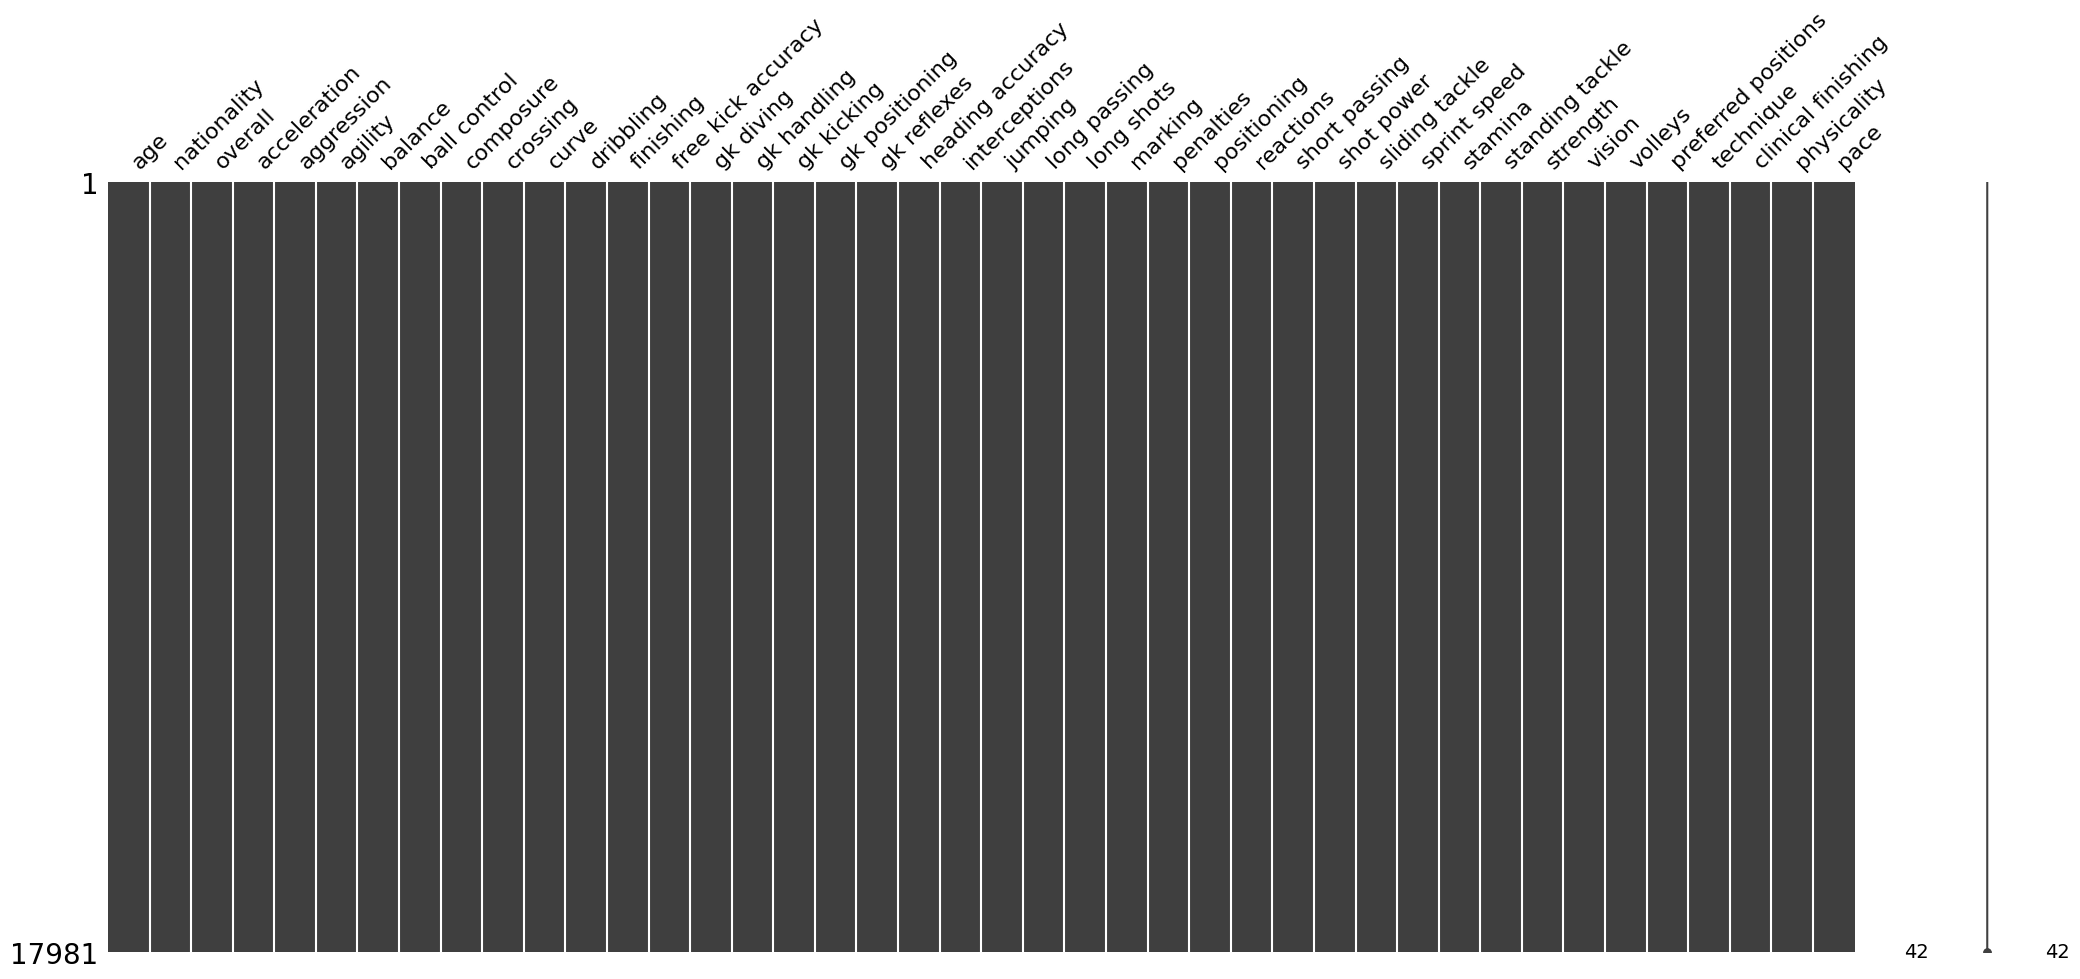

In [ ]:
# Plot the heatmap, where cells that are empty represent missing values.
msno.matrix(df)
plt.show()

##Deductions.
1. There are no missing values.

##5.2 Exploring Distribution of Numerical Variables.

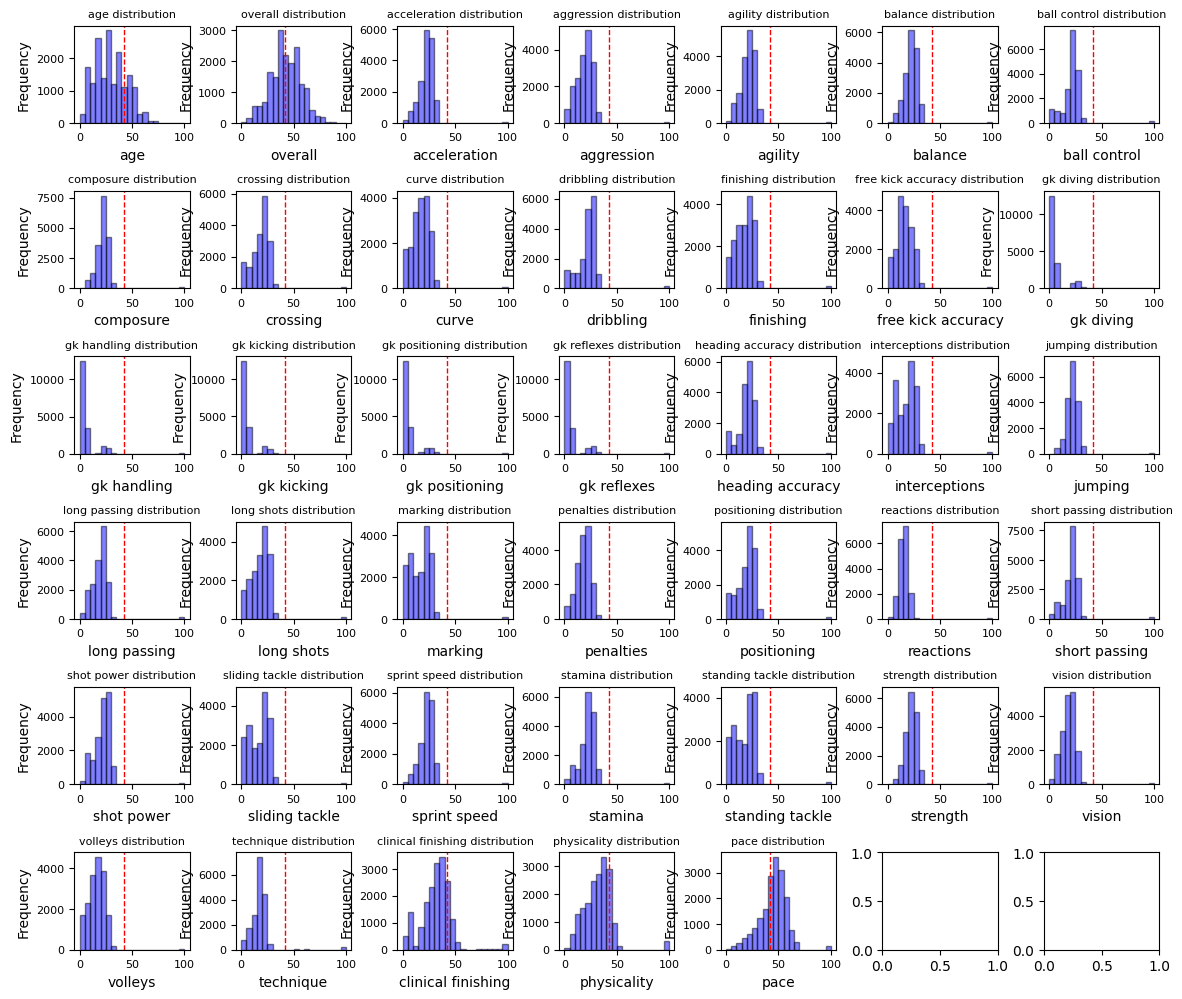

In [ ]:
#Define Numerical Variables.
numerical_variables =  df.select_dtypes(include=['float64', 'int64'])

# Replace values above 250 with 250, to scale down extreme outliers.
numerical_clipped = numerical_variables.clip(upper=250)

# Scale all features to a range of 0 to 100
numerical_scaled = (numerical_clipped - numerical_clipped.min()) / (numerical_clipped.max() - numerical_clipped.min()) * 100

#Plot histogram subplots to inspect the distribution of the variables.
# Set the size of the subplots
fig, axes = plt.subplots(nrows=6, ncols=7, figsize=(14, 12))

# Flatten the axes array
axes = axes.flatten()

# Loop through each column in the DataFrame
for i, (column, data) in enumerate(numerical_scaled.items()):
    ax = axes[i]
    ax.hist(data, bins=20, alpha=0.5, color='blue', edgecolor='black')
    ax.axvline(x=numerical_scaled['overall'].mean(), color='red', linestyle='dashed', linewidth=1) # Add mean line
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{column} distribution', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Show the plot
plt.show()


##Deductions.
1. All the features apart from 'marking', 'standing tackle', 'sliding tackle' and 'clinical finishing' have a regular distribution.
2. There is a heavy presence of outliers in all the variables.


##5.3 Exploring Correlation of Numerical Variables.


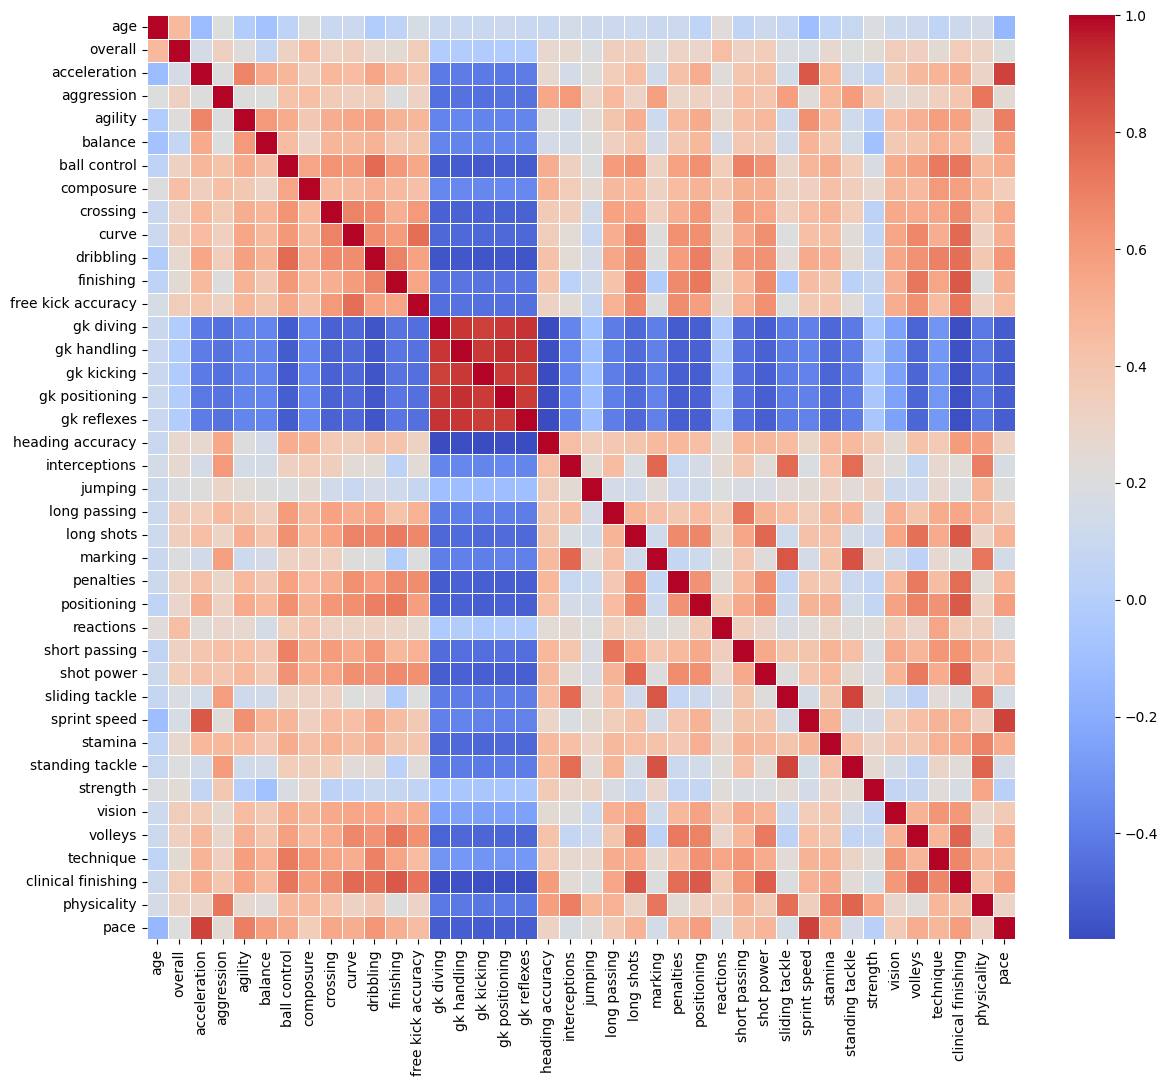

In [ ]:
# Compute the correlation matrix
corr = numerical_scaled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a heatmap
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Show the plot
plt.show()

In [ ]:

# Initialize an empty set to store unique correlation values
seen_correlations = set()

# Find variables with positive correlation above 0.5 and unique correlations
positive_corr_vars = []
for (var1, var2), correlation in corr.unstack().items():
    if (var1 != var2) and (correlation > 0.5) and (correlation not in seen_correlations):
        positive_corr_vars.append((var1, var2, correlation))
        seen_correlations.add(correlation)

# Sort by correlation coefficient in descending order
positive_corr_vars.sort(key=lambda x: x[2], reverse=False)

# Display the result
print("Variables with positive correlation above 0.5 in descending order (excluding duplicate correlations):")
for var1, var2, correlation in positive_corr_vars:
    print(f"{var1} and {var2}: {correlation}")

Variables with positive correlation above 0.5 in descending order (excluding duplicate correlations):
free kick accuracy and long passing: 0.5003337210109443
balance and technique: 0.5026784914777366
free kick accuracy and short passing: 0.5031632636807415
long passing and physicality: 0.504126816222832
sprint speed and clinical finishing: 0.5045965215458935
stamina and technique: 0.5048860822717555
composure and dribbling: 0.5070942830701869
long passing and vision: 0.5087953262036612
agility and volleys: 0.5089397722694317
positioning and stamina: 0.5109274048366306
dribbling and stamina: 0.5114883320377783
finishing and vision: 0.5118773814817162
crossing and penalties: 0.5146520614201116
finishing and pace: 0.514911816007921
crossing and finishing: 0.516089155838073
composure and short passing: 0.5162641331738927
composure and shot power: 0.5171275510891652
agility and long shots: 0.5178114658095202
acceleration and clinical finishing: 0.5189949221824733
acceleration and positionin

In [ ]:
# Initialize an empty set to store unique correlation values
seen_correlations = set()

# Find variables with negative correlation below -0.1 and unique correlations
negative_corr_vars = []
for (var1, var2), correlation in corr.unstack().items():
    if (var1 != var2) and (correlation < -0.1) and (correlation not in seen_correlations):
        negative_corr_vars.append((var1, var2, correlation))
        seen_correlations.add(correlation)

# Sort by correlation coefficient in ascending order
negative_corr_vars.sort(key=lambda x: x[2])

# Display the result
print("Variables with negative correlation below -0.5 in ascending order (excluding duplicate correlations):")
for var1, var2, correlation in negative_corr_vars:
    print(f"{var1} and {var2}: {correlation}")

Variables with negative correlation below -0.5 in ascending order (excluding duplicate correlations):
gk diving and heading accuracy: -0.5814849828800701
gk kicking and heading accuracy: -0.5799666310688263
gk reflexes and heading accuracy: -0.5785576275212201
gk handling and heading accuracy: -0.5734567292371596
gk positioning and heading accuracy: -0.5720744925420129
gk diving and clinical finishing: -0.5703583626749132
gk kicking and clinical finishing: -0.5683299424495878
gk reflexes and clinical finishing: -0.5642631543801409
gk positioning and clinical finishing: -0.5634053186981444
gk handling and clinical finishing: -0.5592347895540248
dribbling and gk diving: -0.5472599780345669
dribbling and gk kicking: -0.5453971471800455
dribbling and gk reflexes: -0.5447757452901775
dribbling and gk handling: -0.5406459701881581
dribbling and gk positioning: -0.5403640348907397
ball control and gk kicking: -0.5312001821045345
ball control and gk diving: -0.5241337412871694
ball control and

##Deductions.
1. We can observe high correlation between the gk metrics, which suggests gks who are good in one metric will most likely be good in other metrics.
2. There's a high correlation between standing tackle, sliding tackle,physicality, marking, and interceptions. These are all defensive attributes and scouts can accomodate this when searching for a defensive player.
3. There's  high correltion between long shots, shot power, volleys, penalties and curve. This seems to suggests the footballers who have a good strike on them are able to execute all the above actions at a high level. For trainers, if indicators show an athlete is good in one of these attributes, it would be better to develop a programme that will optimise their skill in all the above features.
4. There's a high positve correltion between acceleration and sprint speed and both metrics should be considered when scouting for a quick player e.g a winger, and also for developing a programme for optimising speed in footballers.
5. There's  high positive correlation between ball control, dribbling, short passing. These are skills that can be harnessed through curated individualized training programmes and should be considered by trainors.
6. A positive correlation between agility and balance indicates these two areas of development should be tackled concurrently by trainors and coaches.
7. A negative correlation between gk variables and all the other non-gk variables indicates a goalkeeper's development is very different from outfield players. They should be scouted separately for optimum results.
8. A negative correlation between age and pace indicates younger footballers are quicker and pace reduces as they age.Trainors can curate programmes to optimise on pace in older athletes.


##5.4 Exploring Relationship between Target Variable and Numerical Features.

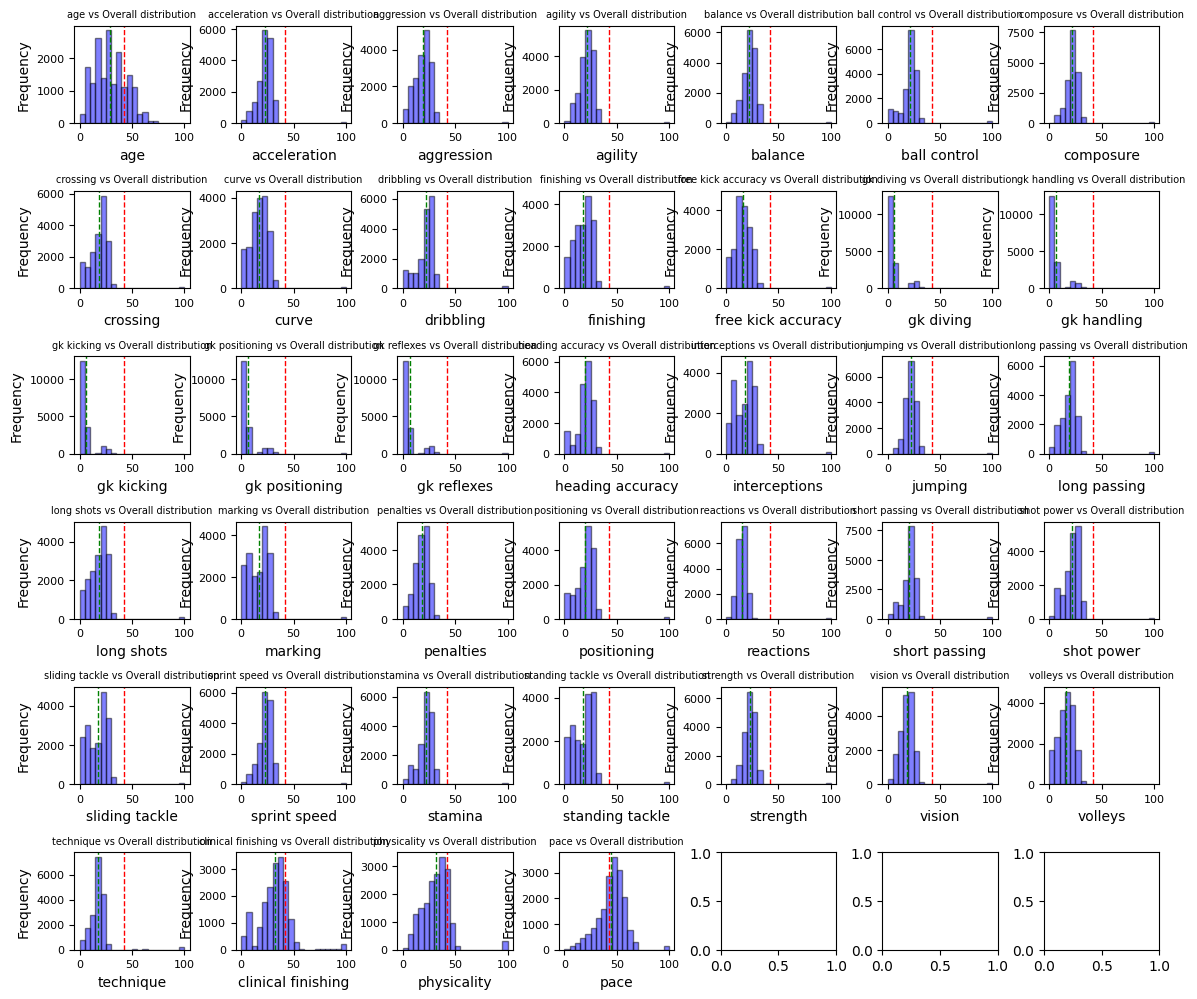

In [ ]:
#Define the Target Variable
target_variable = numerical_scaled['overall']

# Set the size of the subplots
fig, axes = plt.subplots(nrows=6, ncols=7, figsize=(14, 12))

# Flatten the axes array for easier iteration.
axes = axes.flatten()

# Loop through each column (excluding the target variable)
for i, (column, data) in enumerate(numerical_scaled.drop(columns='overall').items()):
    ax = axes[i]
    ax.hist(data, bins=20, alpha=0.5, color='blue', edgecolor='black', label=column)
    ax.axvline(x=target_variable.mean(), color='red', linestyle='dashed', linewidth=1) # Add mean line for the target variable
    ax.axvline(x=data.mean(), color='green', linestyle='dashed', linewidth=1) # Add mean line for the current variable
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{column} vs Overall distribution', fontsize=7)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Show the plot
plt.show()


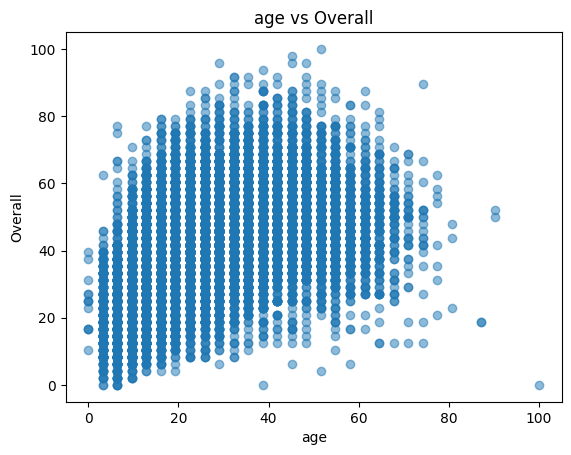

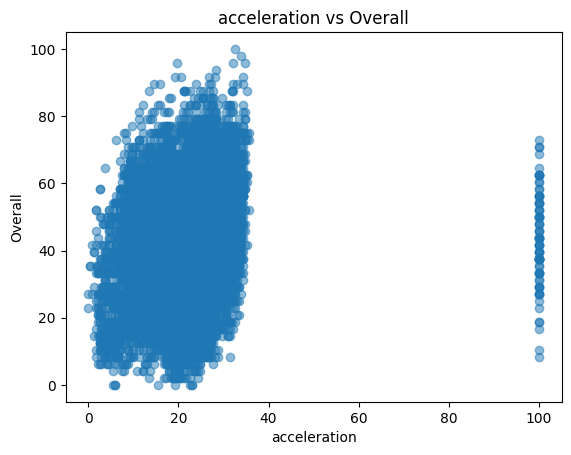

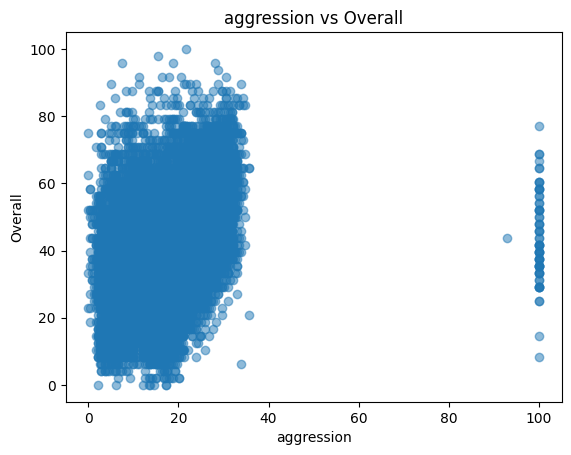

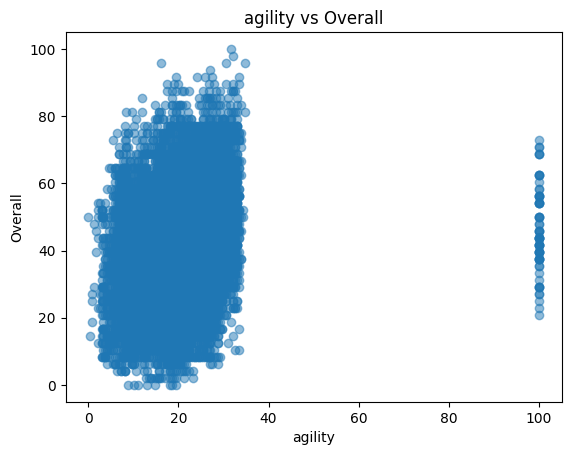

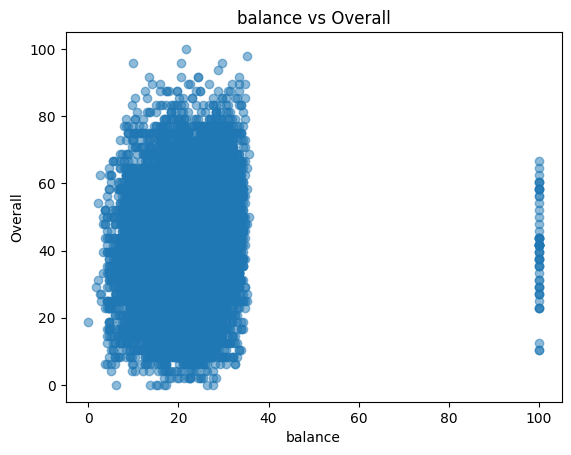

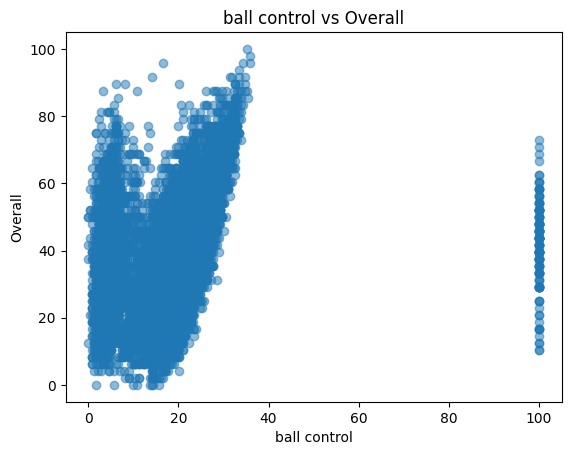

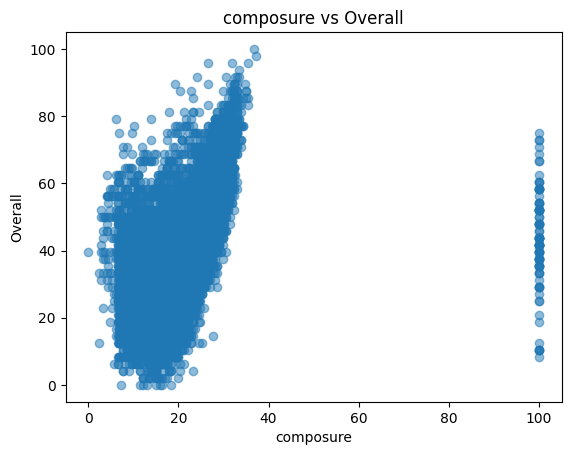

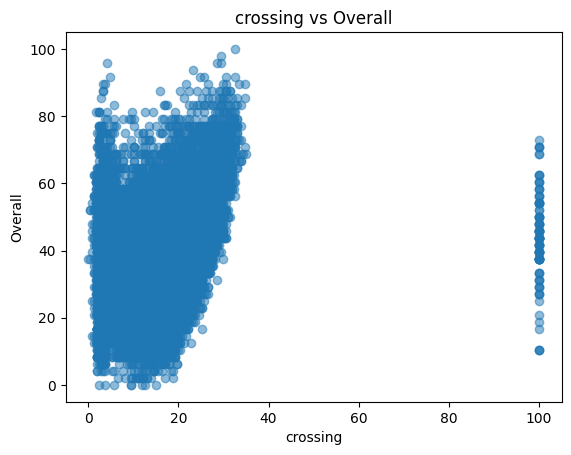

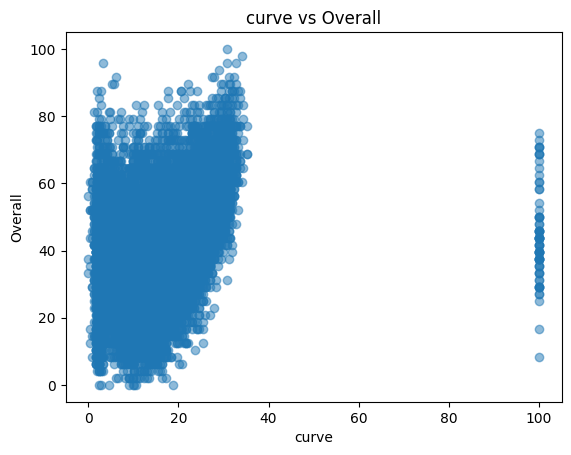

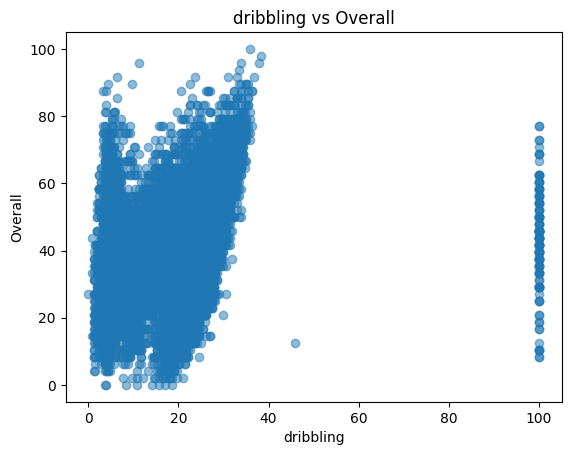

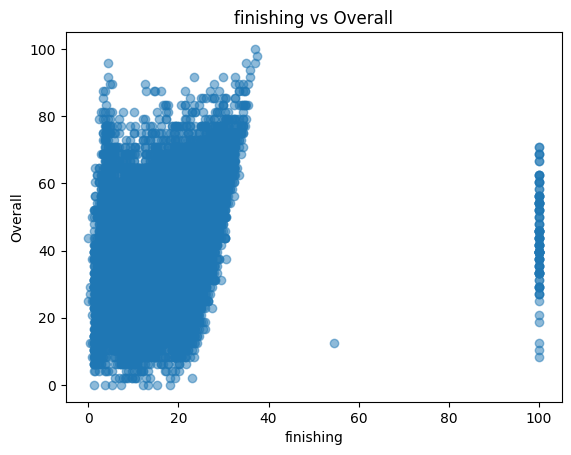

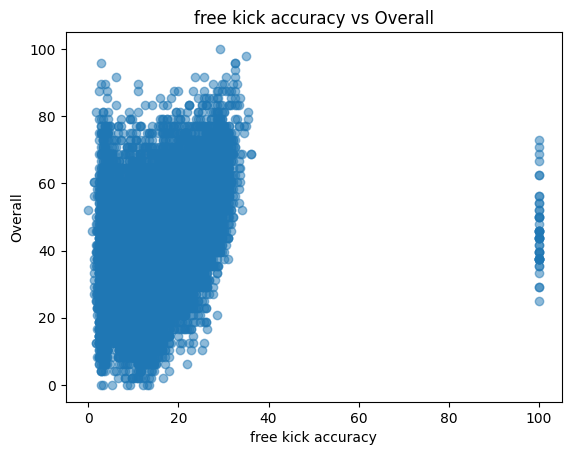

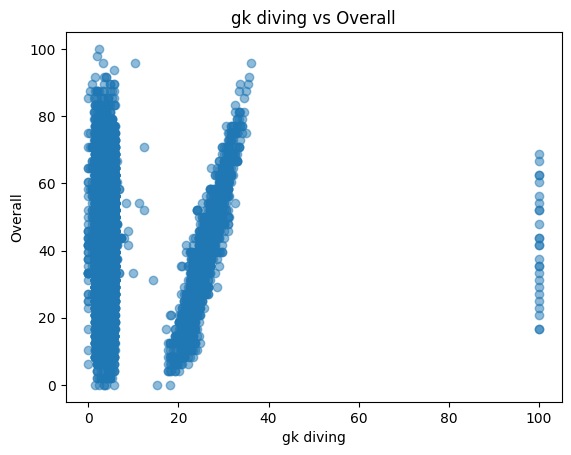

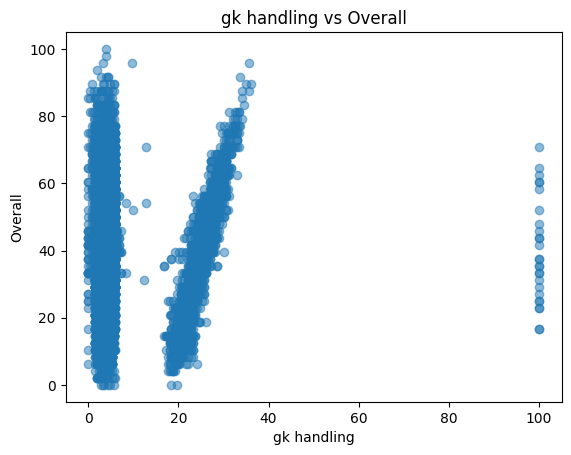

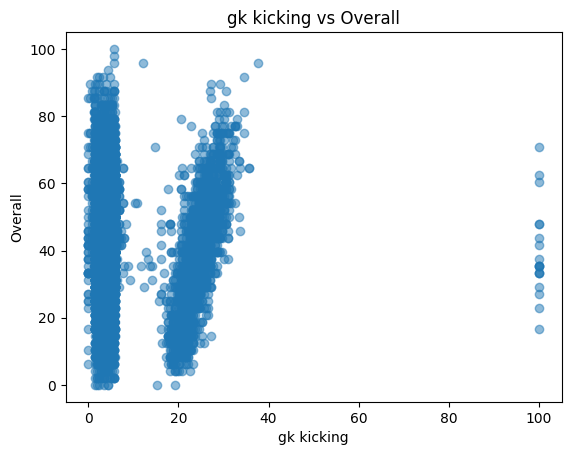

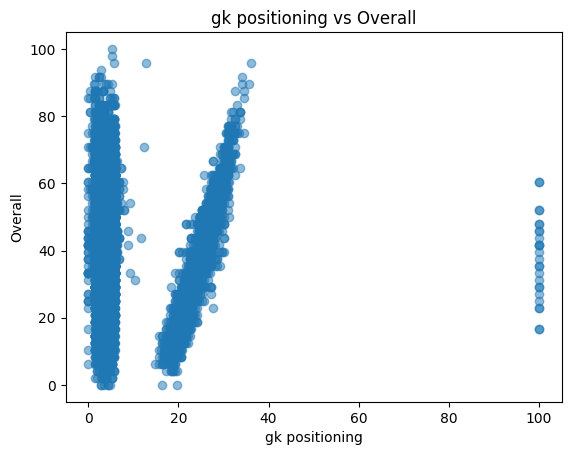

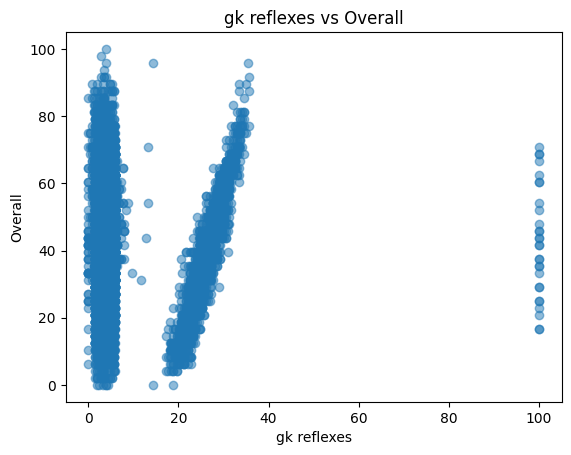

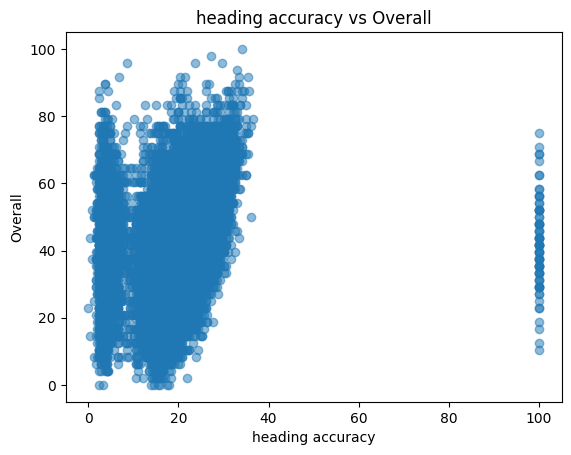

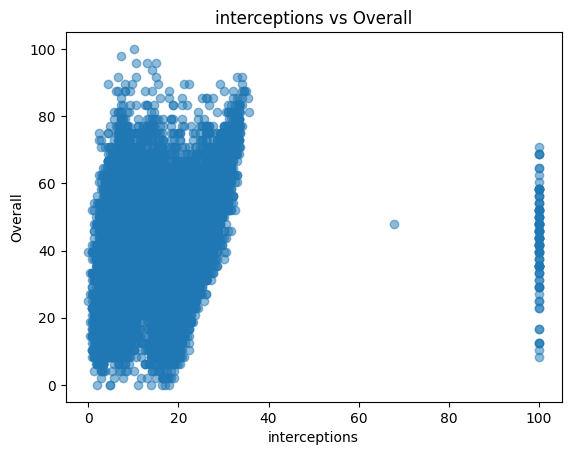

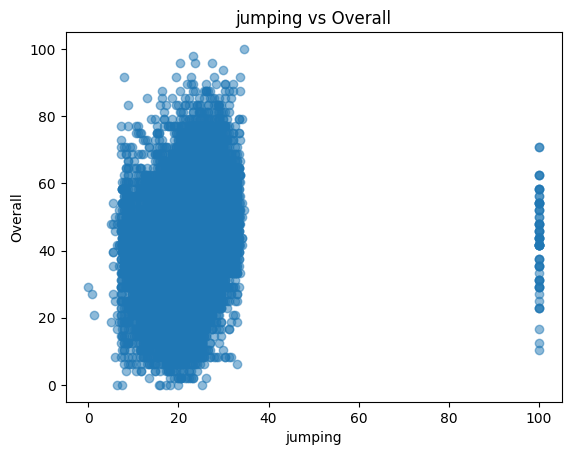

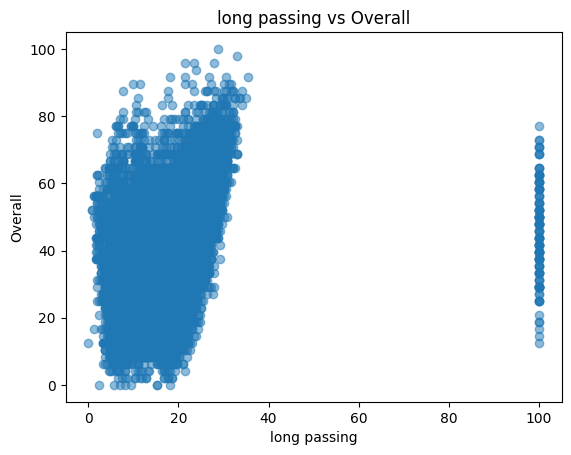

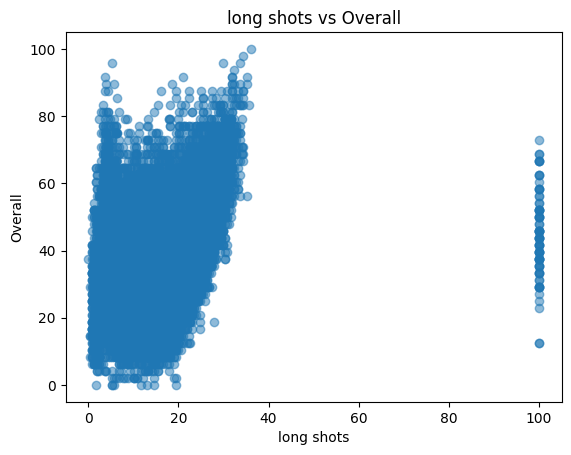

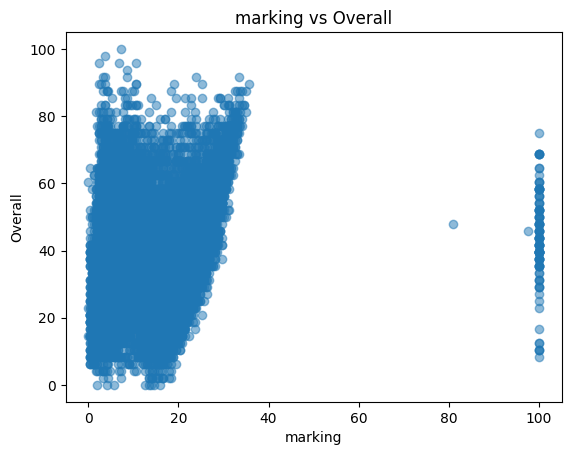

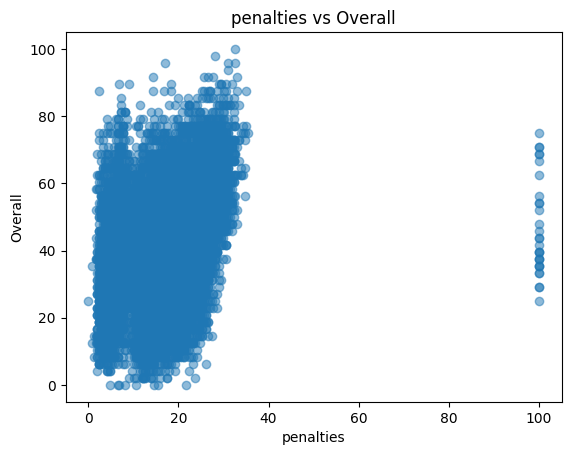

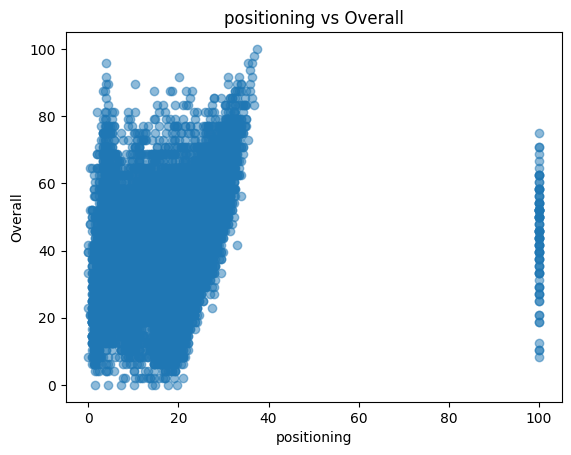

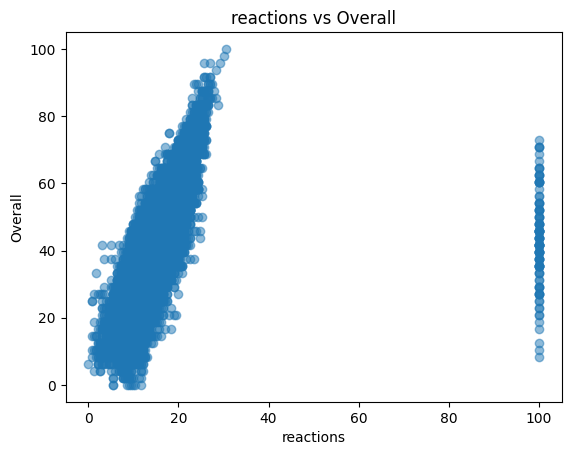

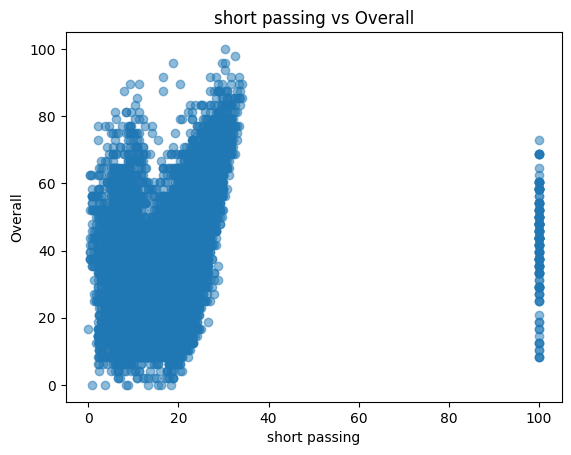

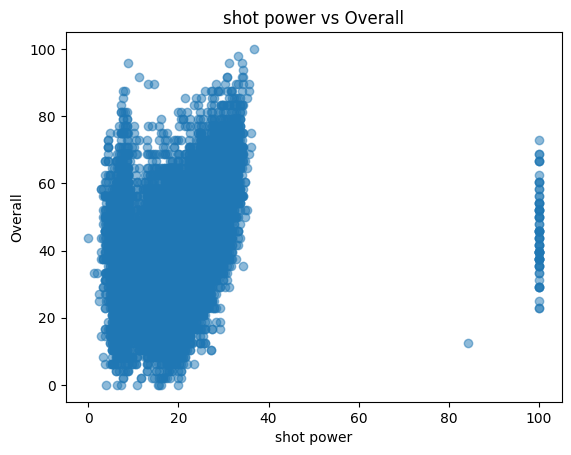

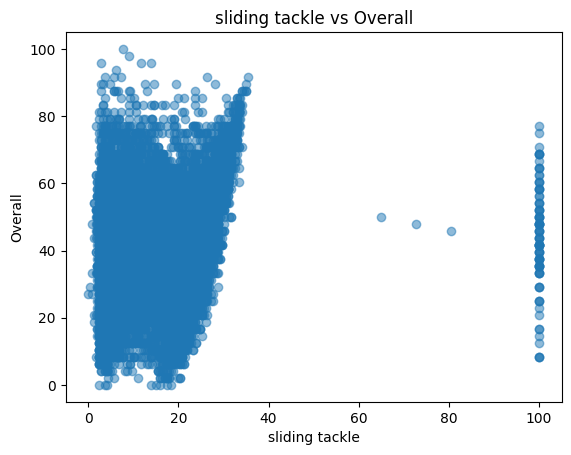

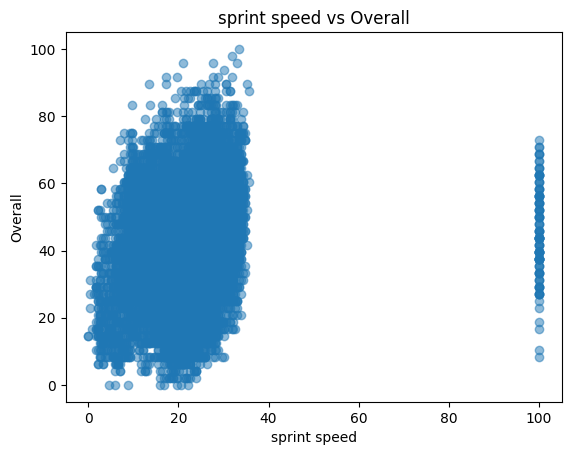

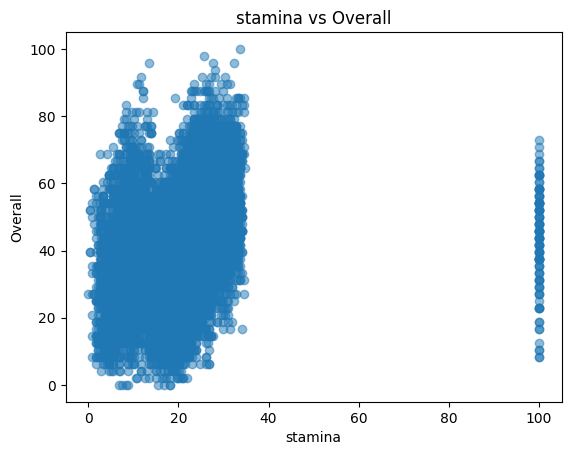

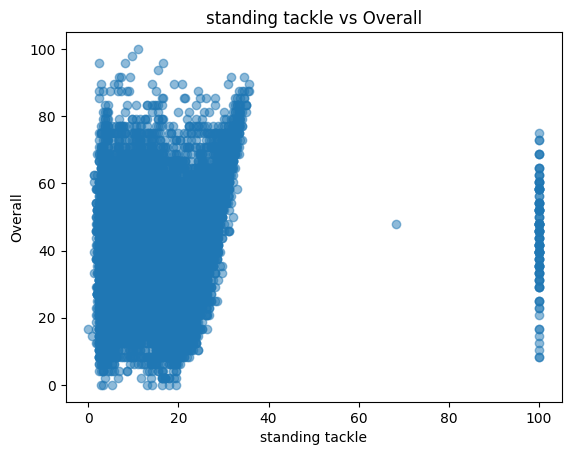

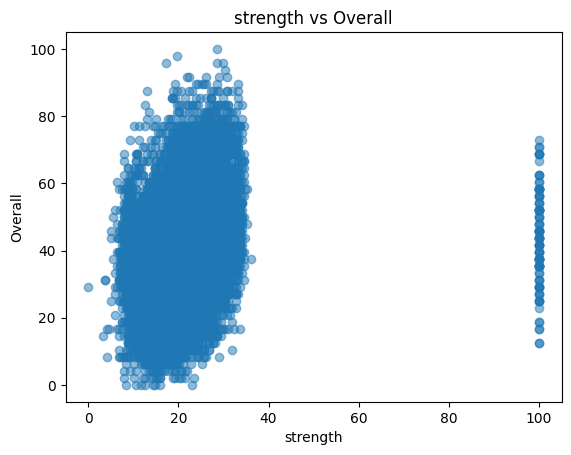

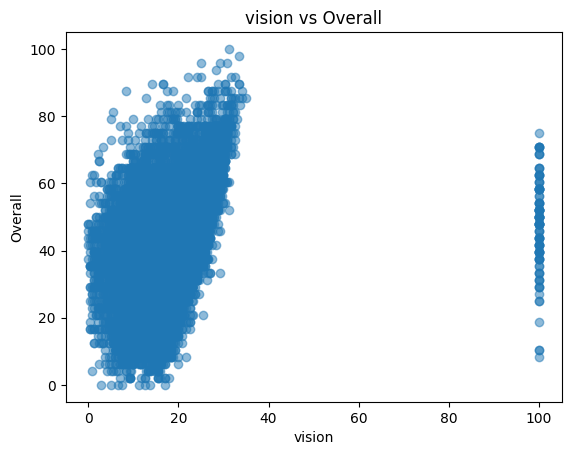

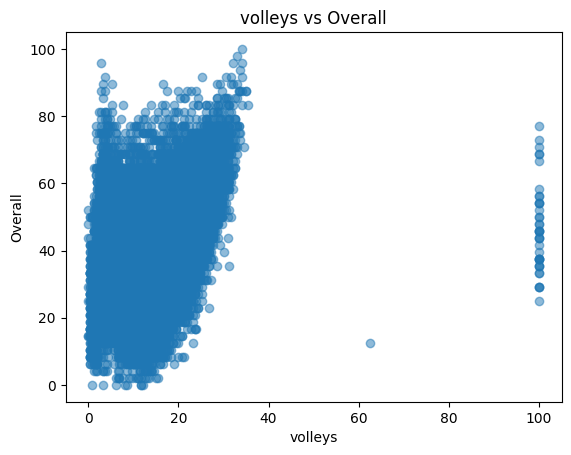

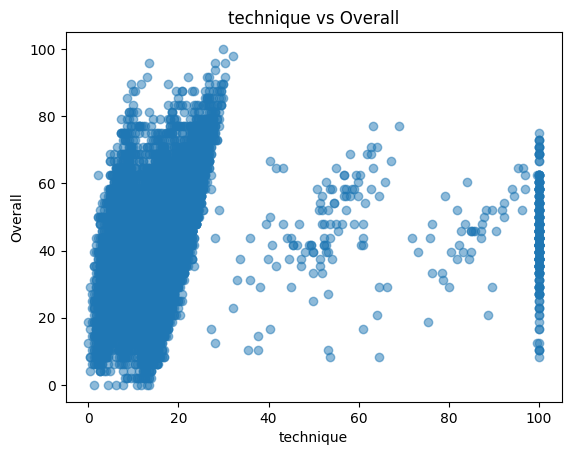

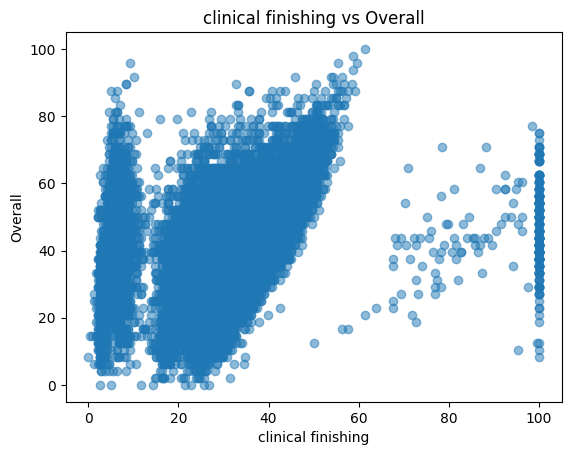

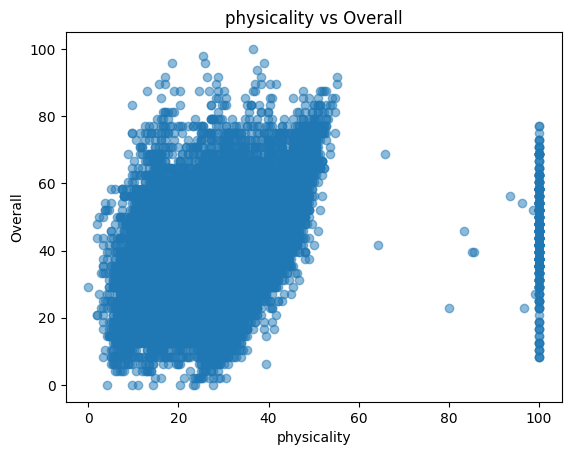

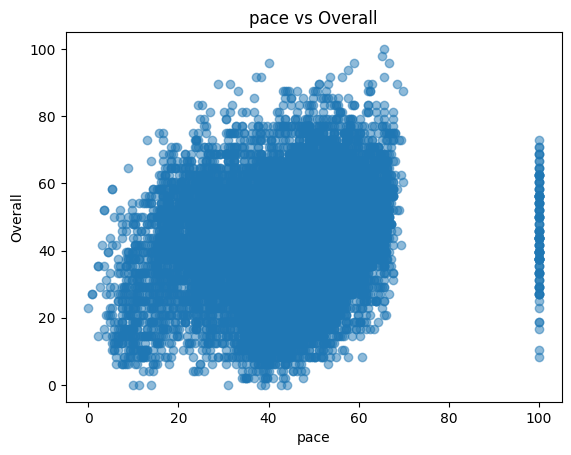

In [ ]:
# Create scatter plots
for column, data in numerical_scaled.drop(columns='overall').items():
    plt.scatter(data, target_variable, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Overall')
    plt.title(f'{column} vs Overall')
    plt.show()

## Deductions.
1. There is a heavy presence of outliers in all the numerical colums.
2. All the variables apart from ball control, interceptions,marking, sliding tackle, standing tackle, and clinical finishing, have normal distribution.
  


##5.5 Exploring Categorical Varibles.

In [ ]:
#Define Categorical Variables.
categorical_variables =  df.select_dtypes(include=['object'])


In [ ]:
categorical_variables.head()

,nationality,preferred positions
Name,,
Cristiano Ronaldo,Portugal,ST LW
L. Messi,Argentina,RW
Neymar,Brazil,LW
L. Suárez,Uruguay,ST
M. Neuer,Germany,GK


##Deductions.
1. There are two categorical variables.

#6.0 Outliers.

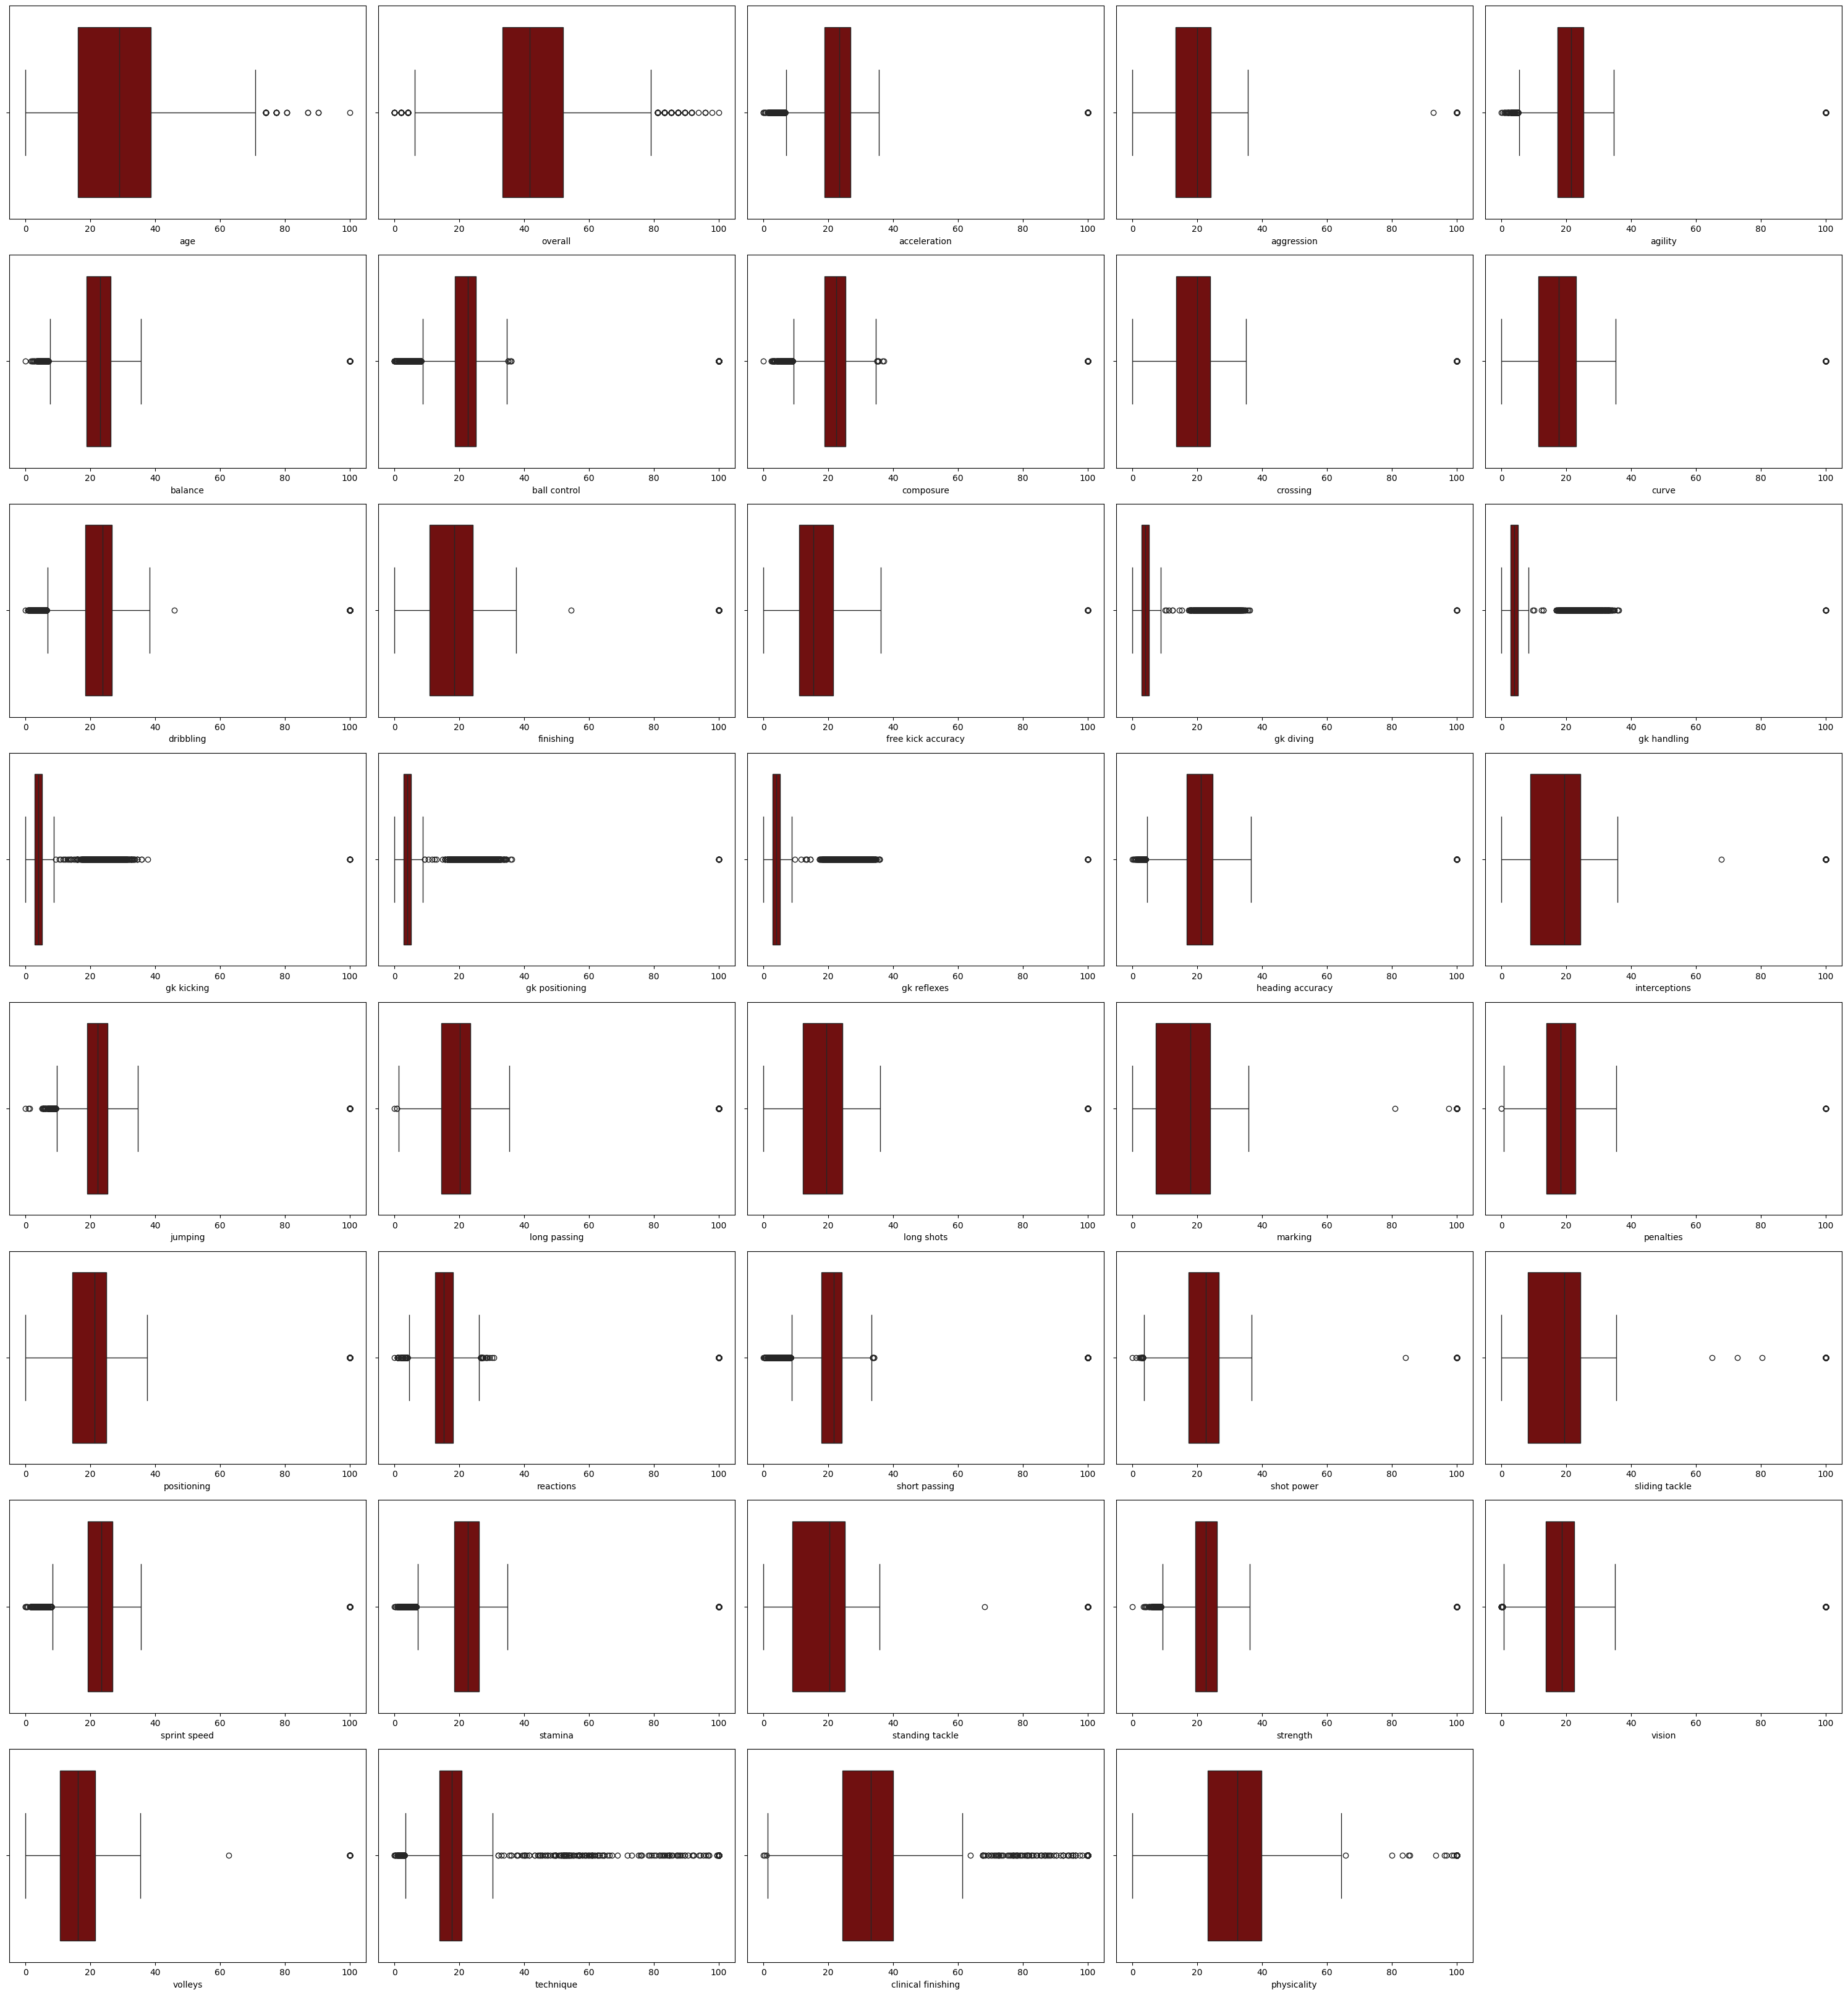

In [ ]:
fig = plt.figure(figsize=(30, 40))

# Adjust the range based on the number of numerical variables you have
for i, col in enumerate(numerical_scaled.columns[:-1]):
    ax = fig.add_subplot(10, 5, i + 1)
    sns.boxplot(data=numerical_scaled, x=numerical_scaled[col], color="Maroon", ax=ax)

plt.tight_layout()
plt.show()

##Deductions.
1. We can detect a heavy presence of outliers in the columns 'acceleration', 'agility', balance', 'ball control', 'composure', 'dribbling', 'heading accuracy', 'jumping', 'reactions', 'short passing', 'shot power', 'stamina', 'stregnth', 'volleys', 'technique', 'clinical finishing', 'physicalty and pace'.
2. This informs us we should select a model that is robust to outliers.

#7.0 Feature Engineering.

In [ ]:
# Drop columns containing 'gk'
numerical_scaled = numerical_scaled.loc[:, ~numerical_scaled.columns.str.contains('gk')]

In [ ]:
# Label encoding
label_encoder = LabelEncoder()
label_encoded_data = categorical_variables.apply(label_encoder.fit_transform)

#print(label_encoded_data[:20])

In [ ]:
# Concatenate numerical_scaled and label_encoded_data
concatenated_data = pd.concat([numerical_scaled, label_encoded_data], axis=1)

#Define X and y.
X = concatenated_data
y = df['overall']


##Deductions.
1. We dropped all the goalkeeper variables as we have determined their effect will be minimal if not negative to the model selected.
2. It would be better to develop a separate scouting and training method for goalkeepers specifically.
3. We have selected to label encode the categorical variables as it is the most suitable for that nature of data.
4. We have defined our X and y variables which we shall use for model fitting.

#8.0 Model Fitting.

##8.1 Linear Regression Models.

###8.1.1 Simple Linear Regression.

In [ ]:
#Train Test Split: Reserve 30% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse_value = mse(y_test, y_pred)

r2_value = r2_score(y_test, y_pred)


print( 'simple linear reg mse value:', mse_value)
print( 'simple linear reg r2 score:',r2_value)


(12586, 37) (5395, 37) (12586,) (5395,)
simple linear reg mse value: 1.483824698505652e-28
simple linear reg r2 score: 1.0


###8.1.2 Ridge Regression.

In [ ]:
pipe = make_pipeline(RobustScaler(),PolynomialFeatures(degree=2), Ridge(alpha=1000))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')

print('r2 scores for individual folds in Ridge Regression:',scores)
print('mean of r2 scores in Ridge Regression:', scores.mean())

r2 scores for individual folds in Ridge Regression: [0.50380089 0.8271788  0.70277075 0.77425664 0.69691011]
mean of r2 scores in Ridge Regression: 0.7009834379546472


###8.1.3 Lasso Regression.

In [ ]:
pipe = make_pipeline(RobustScaler(),PolynomialFeatures(degree=2), Lasso(alpha=2.85, max_iter=10000))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')

print('r2 scores for individual folds in Lasso Regression:',scores)
print('mean of r2 scores in Lasso Regression:', scores.mean())

r2 scores for individual folds in Lasso Regression: [0.72457925 0.72327182 0.7271154  0.7221152  0.72374868]
mean of r2 scores in Lasso Regression: 0.7241660710320754


###8.1.4 Random Forest Regressor.

In [ ]:
model = RandomForestRegressor(n_estimators=1000)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print('r2 scores for individual folds in Random Forest Regression:',scores)
print('mean of r2 scores in Random Forest Regression:', scores.mean())

r2 scores for individual folds in Random Forest Regression: [0.99999705 0.99993768 0.99999365 0.99995477 0.99999596]
mean of r2 scores in Random Forest Regression: 0.9999758235567237


###8.1.5 Elastic Net.

In [ ]:
# Create and fit the model
model = ElasticNet(alpha=2, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print('r2 scores for individual folds in Elastic net:',scores)
print('mean of r2 scores in Elastic net:', scores.mean())

r2 scores for individual folds in Elastic net: [0.70367151 0.70623439 0.70679503 0.70440963 0.70505736]
mean of r2 scores in Elastic net: 0.7052335840230206


##Deductions.
1. Since our target variable is a continuous numerical variable, we shall fit the train data on a linear regression model.
2. We have run our test data through 5 different linear regression models.
3. We have performed 5-fold cross validation for thorough testing of the models and the results are as follows:
1. simple linear reg mse value: 1.483824698505652e-28
2. simple linear reg r2 score: 1.0
3. r2 scores for individual folds in Ridge Regression: [0.50380089 0.8271788  0.70277075 0.77425664 0.69691011]
4. mean of r2 scores in Ridge Regression: 0.7009834379546472
5. r2 scores for individual folds in Lasso Regression: [0.72457925 0.72327182 0.7271154  0.7221152  0.72374868]
6. mean of r2 scores in Lasso Regression: 0.7241660710320754
5. r2 scores for individual folds in Random Forest Regression: [0.99999715 0.99993894 0.99999433 0.99995304 0.9999961 ]
6. mean of r2 scores in Random Forest Regression: 0.9999759116780901
7. r2 scores for individual folds in Elastic net: [0.70367151 0.70623439 0.70679503 0.70440963 0.70505736]
8. mean of r2 scores in Elastic net: 0.7052335840230206


#8.1 Model Selection.
1. We have selected Lasso regression as our model of choice as it has expressed optimal robustness in modeling the train data accross all 5 cross-validation folds.

In [ ]:
pipe = make_pipeline(RobustScaler(),PolynomialFeatures(degree=2), Lasso(alpha=3, max_iter=10000))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')

print('r2 scores for individual folds in Lasso Regression:',scores)
print('mean of r2 scores in Lasso Regression:', scores.mean())

r2 scores for individual folds in Lasso Regression: [0.69482465 0.69337598 0.6976348  0.6920944  0.69390436]
mean of r2 scores in Lasso Regression: 0.6943668377086707


##Deductions.
1. We have selected to have polynomial features to be modelled to the 2nd degree an alpha penalty of three, as well as set a maximum iteration of 1000, to fine tune our model towards achieving a desired bias, variance tradeoff.
2. Modeling data on this system will optimise predictive analysis for scouts and trainors and enable them to execute well informed decisions.